# **Exploratory Data Analysis for Hourly Energy Consumption Dataset**

These datasets tell about a regional transmission organization (RTO) in the US. They are run under one large company called PJM Interconnection LLC(PJM). RTO operates an electric transmission in the eastern part of the US, so that makes it a part of the Eastern Interconnection grid. The states with this company in it are Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The datasets which will be converted to one table will consists of 12 variables which are:


*   Datetime 
*   AEP_MW
*   COMED_MW
*   DAYTON_MW
*   DEOK_MW
*   DOM_MW 
*   DUQ_MW
*   EKPC_MW
*   FE_MW
*   NI_MW
*   PJM_Load_MW
*   PJME_MW
*   PJMW_MW

MW in these datasets means megawatts to indicate the hourly consumption. The purpose of this research is to analyze the trends among each datasets in order to predict and acknowledge the energy consumption usage depends on the time it is in may it be seasonal, holidays, even daily in the final year that appeared which is 2018. 

Note that the regions have changed over the years so data may only appear for certain dates per region. To operate these datasets, we shall fix them first.

### Fixing the Dataset

We first import the functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Then, we import out the files via google drive using this function.

In [2]:
# Connecting GDrive with Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then, we import out the library first to interact with the file system.

In [3]:
# import library os so it can interact with file system that is in Google Colab operating system
import os

os.chdir("/content/drive/My Drive/Datasets/Hourly_Energy/PJM_Dataset")

Then, we import out the datasets using read table. We put the csv data, then the `sep='' `function to separate each column, then followed by `engine="python"` to define the program we use.

In [4]:
#importing the dataset
AEP = pd.read_table("AEP_hourly.csv", sep=",", engine="python")
COMED = pd.read_table("COMED_hourly.csv", sep=",", engine="python")
DAYTON = pd.read_table("DAYTON_hourly.csv", sep=",",engine="python")
DEOK = pd.read_table("DEOK_hourly.csv", sep=",", engine="python")
DOM = pd.read_table("DOM_hourly.csv", sep=",",engine="python")
DUQ = pd.read_table("DUQ_hourly.csv", sep=",",engine="python")
EKPC = pd.read_table("EKPC_hourly.csv", sep=",", engine="python")

In [5]:
FE = pd.read_table("FE_hourly.csv", sep=",",engine="python")
NI = pd.read_table("NI_hourly.csv", sep=",", engine="python")
PJMLoad = pd.read_table("PJM_Load_hourly.csv", sep=",", engine="python")
PJME = pd.read_table("PJME_hourly.csv", sep=",",  engine="python")
PJMW = pd.read_table("PJMW_hourly.csv", sep=",", engine="python")

Then, we print out the dataset.

In [6]:
data = [AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJMLoad,PJME,PJMW]
hec = pd.concat(data)
hec

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW
0,2004-12-31 01:00:00,13478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-12-31 02:00:00,12865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-12-31 03:00:00,12577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-12-31 04:00:00,12517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-12-31 05:00:00,12670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8401.0
143202,2018-01-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8373.0
143203,2018-01-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8238.0
143204,2018-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7958.0


Turns out the data are mostly missing. To fill out the missing values, we use `fillna()` for each column. Here, we use `mean()` to replace the missing values. 

In [7]:
mean = pd.DataFrame(hec)

#Finding the mean of the column having NaN
mean['AEP_MW'].fillna(hec['AEP_MW'].mean(), inplace=True)
mean['COMED_MW'].fillna(hec['COMED_MW'].mean(), inplace=True)
mean['DAYTON_MW'].fillna(hec['DAYTON_MW'].mean(), inplace=True)
mean['DEOK_MW'].fillna(hec['DEOK_MW'].mean(), inplace=True)
mean['DOM_MW'].fillna(hec['DOM_MW'].mean(), inplace=True)
mean['DUQ_MW'].fillna(hec['DUQ_MW'].mean(), inplace=True)
mean['EKPC_MW'].fillna(hec['EKPC_MW'].mean(), inplace=True)
mean['FE_MW'].fillna(hec['FE_MW'].mean(), inplace=True)
mean['NI_MW'].fillna(hec['NI_MW'].mean(), inplace=True)
mean['PJM_Load_MW'].fillna(hec['PJM_Load_MW'].mean(), inplace=True)
mean['PJME_MW'].fillna(hec['PJME_MW'].mean(), inplace=True)
mean['PJMW_MW'].fillna(hec['PJMW_MW'].mean(), inplace=True)
mean

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW
0,2004-12-31 01:00:00,13478.000000,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,5602.375089
1,2004-12-31 02:00:00,12865.000000,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,5602.375089
2,2004-12-31 03:00:00,12577.000000,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,5602.375089
3,2004-12-31 04:00:00,12517.000000,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,5602.375089
4,2004-12-31 05:00:00,12670.000000,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,5602.375089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,8401.000000
143202,2018-01-01 21:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,8373.000000
143203,2018-01-01 22:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,8238.000000
143204,2018-01-01 23:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,29766.427408,32080.222831,7958.000000


After that, we change the datatype so that we can operate them later on. We first identify the dataset's datatype first.

In [8]:
hec.dtypes

Datetime        object
AEP_MW         float64
COMED_MW       float64
DAYTON_MW      float64
DEOK_MW        float64
DOM_MW         float64
DUQ_MW         float64
EKPC_MW        float64
FE_MW          float64
NI_MW          float64
PJM_Load_MW    float64
PJME_MW        float64
PJMW_MW        float64
dtype: object

Turns out the datasets are all object and float. In order for it to be able to be plot, we shall change it to integer. We can use iteration to change all the data types.

In [9]:
cols = ['AEP_MW','COMED_MW','DAYTON_MW','DEOK_MW','DOM_MW','DUQ_MW','EKPC_MW','FE_MW','NI_MW','PJM_Load_MW','PJME_MW','PJMW_MW']
for col in cols:
   hec[col] = hec[col].astype('int')

hec

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW
0,2004-12-31 01:00:00,13478,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602
1,2004-12-31 02:00:00,12865,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602
2,2004-12-31 03:00:00,12577,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602
3,2004-12-31 04:00:00,12517,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602
4,2004-12-31 05:00:00,12670,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8401
143202,2018-01-01 21:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8373
143203,2018-01-01 22:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8238
143204,2018-01-01 23:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,7958


After filling the dataset, we can start operating out the values we want to find here.

### Training the dataset

Here, I want to split the dataset so that it shows 2018 data only for the year. I first import out the datetime and define it as dt. Then, I add more column which is year.

In [10]:
from datetime import datetime as dt

In [11]:
hec['year'] = pd.DatetimeIndex(hec['Datetime']).year
hec

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,year
0,2004-12-31 01:00:00,13478,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004
1,2004-12-31 02:00:00,12865,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004
2,2004-12-31 03:00:00,12577,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004
3,2004-12-31 04:00:00,12517,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004
4,2004-12-31 05:00:00,12670,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8401,2018
143202,2018-01-01 21:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8373,2018
143203,2018-01-01 22:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8238,2018
143204,2018-01-01 23:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,7958,2018


After that, I group the year to 2018 so that the data that will be shown are from 2018.

In [12]:
last_year = hec.loc[hec.year == 2018]
last_year

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,year
107401,2018-01-01 00:00:00,18687,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2018
116138,2018-08-02 01:00:00,13286,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2018
116139,2018-08-02 02:00:00,12587,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2018
116140,2018-08-02 03:00:00,12296,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2018
116141,2018-08-02 04:00:00,12059,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8401,2018
143202,2018-01-01 21:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8373,2018
143203,2018-01-01 22:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8238,2018
143204,2018-01-01 23:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,7958,2018


After that I import XGB in order to plot out the testing data.

In [13]:
import xgboost as xgb
my_xgb = xgb.XGBRFRegressor()
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Then, I turn the datetime to index so that I later can differ the training and testing based on the dates.

In [14]:
last_year2 = last_year.set_index('Datetime')
last_year2.index = pd.to_datetime(last_year2.index)

Then, I set the dates for each train and test.

In [15]:
train = last_year2['AEP_MW'].loc[last_year2.index < "2018-04-01"]
test = last_year2['AEP_MW'].loc[last_year2.index >= "2018-04-01"]

Now, I can plot them out in a graph.

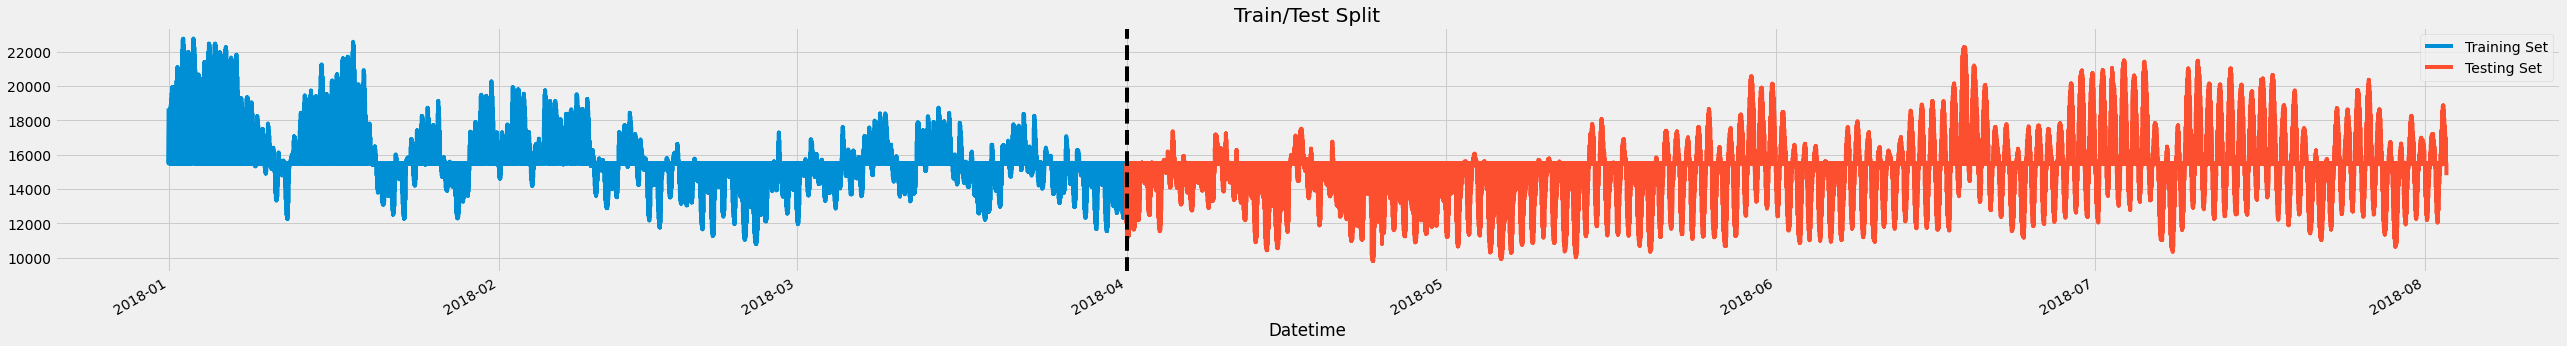

In [213]:
fig, ax = plt.subplots(figsize = (40, 5))
train.plot(ax = ax, label = "Training Set", title = "Train/Test Split")
test.plot(ax = ax, label = "Testing Set")
ax.axvline("2018-04-01", color = "black", ls = "--")
ax.legend(["Training Set", "Testing Set"])
plt.show()

We can see that the data splitting is successful. The blue indicates the training and the orange indicates the testing. This graph for both is separated by the black line.

### Trends in energy consumption around hours of day, holiday, or long term trends.

Now, we want to predict the energy consumption around hours of day. We firstly find the mean throughout the years of each dataset. We start from AEP. 

In [16]:
from datetime import datetime

In [17]:
hec['hour'] = pd.DatetimeIndex(hec['Datetime']).hour
hec

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,year,hour
0,2004-12-31 01:00:00,13478,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,1
1,2004-12-31 02:00:00,12865,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,2
2,2004-12-31 03:00:00,12577,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,3
3,2004-12-31 04:00:00,12517,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,4
4,2004-12-31 05:00:00,12670,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8401,2018,20
143202,2018-01-01 21:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8373,2018,21
143203,2018-01-01 22:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8238,2018,22
143204,2018-01-01 23:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,7958,2018,23


In [18]:
AEP_mean = hec.groupby('hour')['AEP_MW'].mean().sort_values()
AEP_mean

hour
4     15231.634052
3     15241.470963
5     15247.755739
2     15269.122761
6     15310.260835
1     15320.170258
0     15404.689151
7     15419.199996
8     15496.756202
23    15513.861768
9     15535.005063
10    15564.110277
11    15588.810328
12    15599.029517
16    15604.183421
22    15606.904647
13    15607.886443
15    15609.557087
14    15614.192406
17    15615.033501
18    15639.607801
21    15639.704167
20    15646.104004
19    15651.376285
Name: AEP_MW, dtype: float64

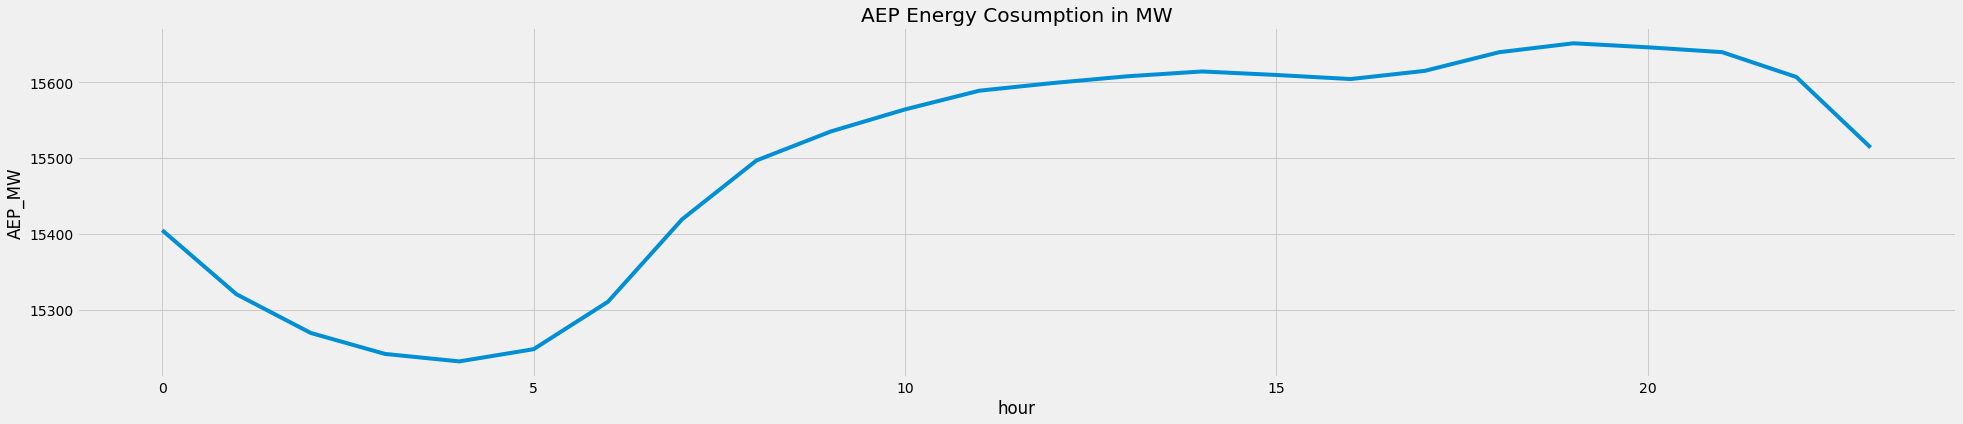

In [19]:
plt.figure(figsize=(30,6))
plt.title("AEP Energy Cosumption in MW")
sns.lineplot(data=AEP_mean)

From the plot, the highest energy consumption

In [218]:
EKPC_mean = hec.groupby('hour')['EKPC_MW'].mean().sort_values()
EKPC_mean

hour
4     1454.096852
3     1454.445227
5     1454.760340
2     1455.564101
6     1457.198543
1     1457.749576
0     1461.480715
7     1461.550373
8     1463.598226
9     1464.125685
10    1464.791926
11    1465.150228
12    1465.382162
13    1465.869693
14    1466.265948
15    1466.376527
23    1466.420902
16    1466.869032
17    1468.337237
22    1470.321521
18    1470.417292
21    1471.659572
19    1471.835311
20    1471.916115
Name: EKPC_MW, dtype: float64

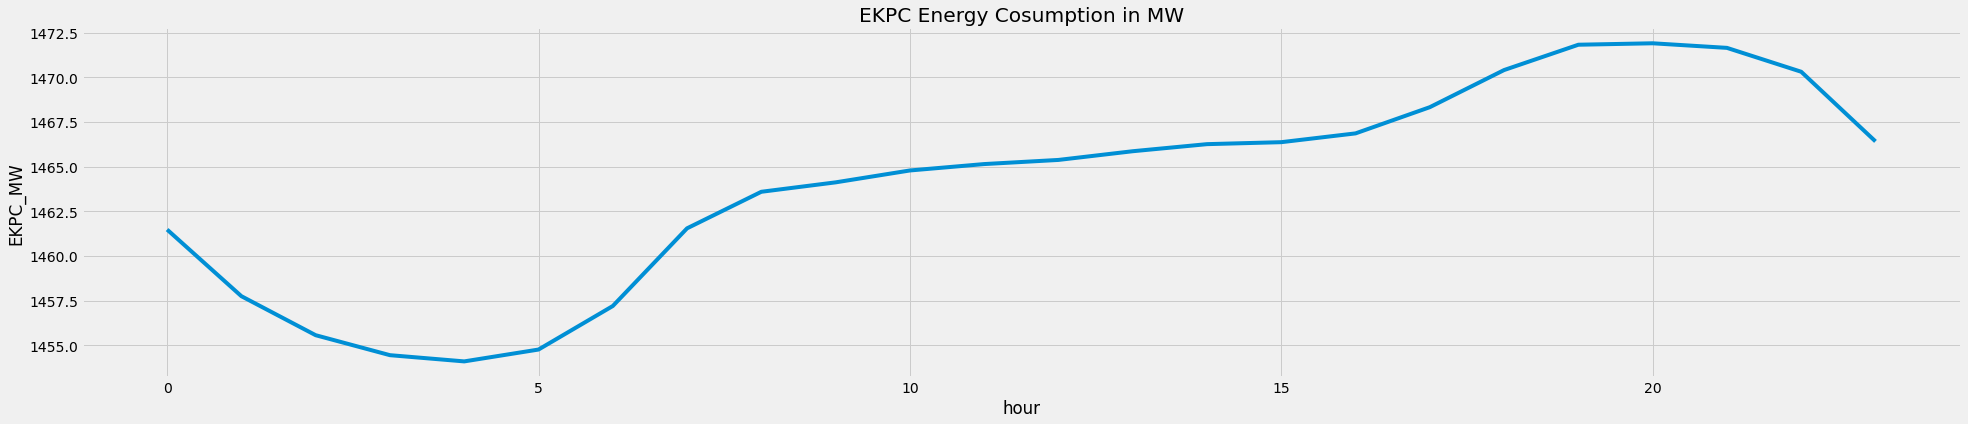

In [219]:
plt.figure(figsize=(30,6))
plt.title("EKPC Energy Cosumption in MW")
sns.lineplot(data=EKPC_mean)

In [220]:
PJMW_mean = hec.groupby('hour')['PJMW_MW'].mean().sort_values()
PJMW_mean

hour
4     5479.899340
3     5483.140514
5     5488.098633
2     5493.952411
1     5515.101274
6     5517.429068
0     5553.181622
7     5565.406485
8     5597.949836
23    5604.131540
9     5616.012216
10    5630.403425
11    5641.687768
12    5647.389404
15    5648.130418
16    5648.717836
13    5649.021329
14    5650.465970
22    5651.957804
17    5658.385552
21    5674.277828
18    5675.144395
20    5678.397174
19    5680.461821
Name: PJMW_MW, dtype: float64

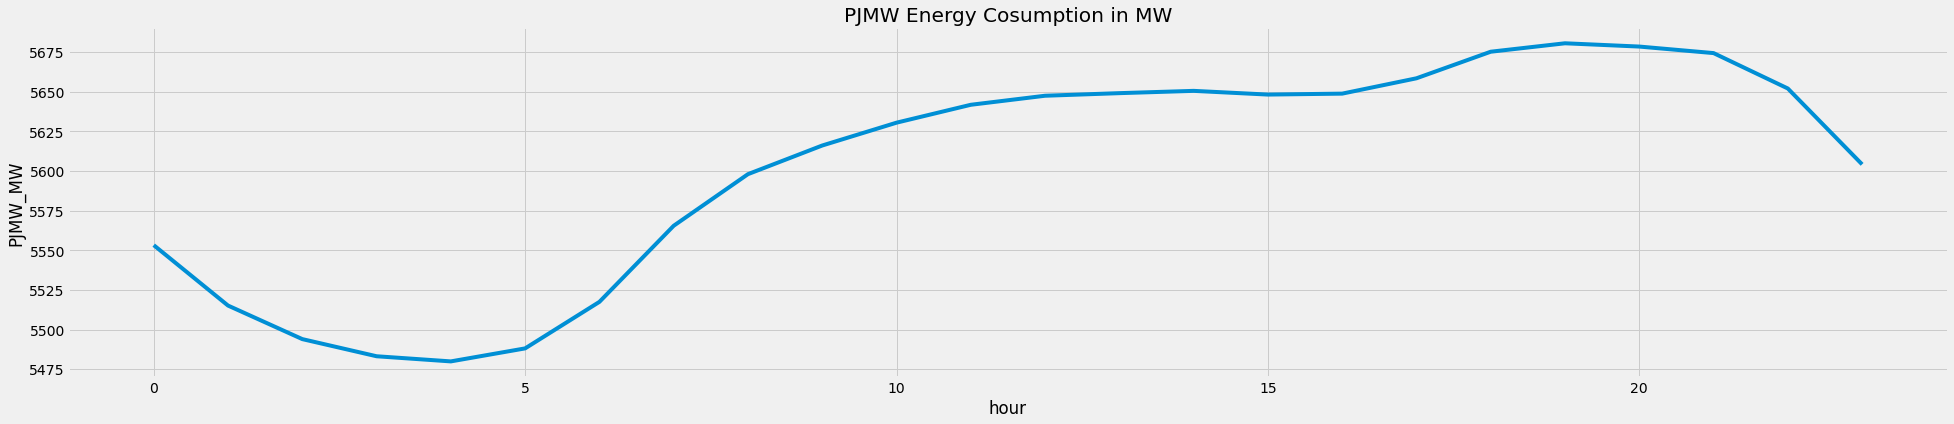

In [221]:
plt.figure(figsize=(30,6))
plt.title("PJMW Energy Cosumption in MW")
sns.lineplot(data=PJMW_mean)

After that, I want to show energy consumption during holidays. I first import out all the american holidays by installing holidays package for pandas.


In [20]:
!pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Then, I import holidays from the package and define the holiday by setting it to US holidays.

In [21]:
import holidays
holiday = holidays.US()

Then, I make a new table for differentiating the columns from the main table since we add holiday column. Here, I use lambda to specify the holiday datetime.

In [22]:
hec2 = hec
hec2['Datetime'] = pd.to_datetime(hec['Datetime'])
hec2['holidays'] = hec2['Datetime'].apply(lambda d: d in holiday)
hec2

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,year,hour,holidays
0,2004-12-31 01:00:00,13478,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,1,True
1,2004-12-31 02:00:00,12865,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,2,True
2,2004-12-31 03:00:00,12577,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,3,True
3,2004-12-31 04:00:00,12517,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,4,True
4,2004-12-31 05:00:00,12670,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,5602,2004,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8401,2018,20,True
143202,2018-01-01 21:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8373,2018,21,True
143203,2018-01-01 22:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,8238,2018,22,True
143204,2018-01-01 23:00:00,15499,11420,2037,3105,10949,1658,1464,7792,11701,29766,32080,7958,2018,23,True


Then, I print out the dataset using pivot table and put the holiday function. I first print the data from AEP to see the trend.

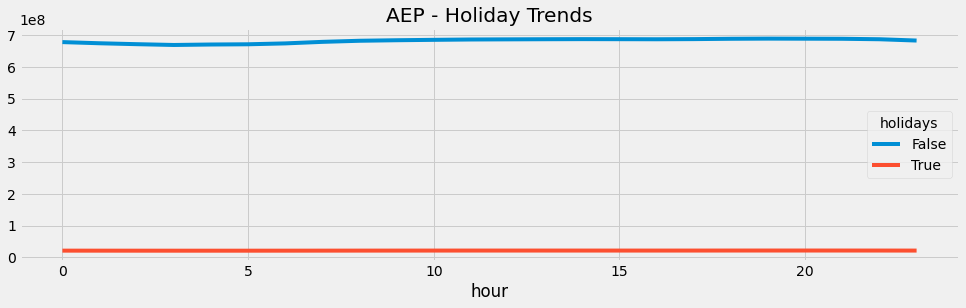

In [23]:
holi_trends = hec2.pivot_table(index=hec2['hour'], 
                     columns=('holidays'), 
                     values='AEP_MW',
                     aggfunc='sum').plot(figsize=(15,4),
                     title='AEP - Holiday Trends')

The result shows that the plot is under the radar which is close to 0 meaning that the consumption is not as high as daily use like we have seen in hour trends. 

Now, I want to see from PJMW.

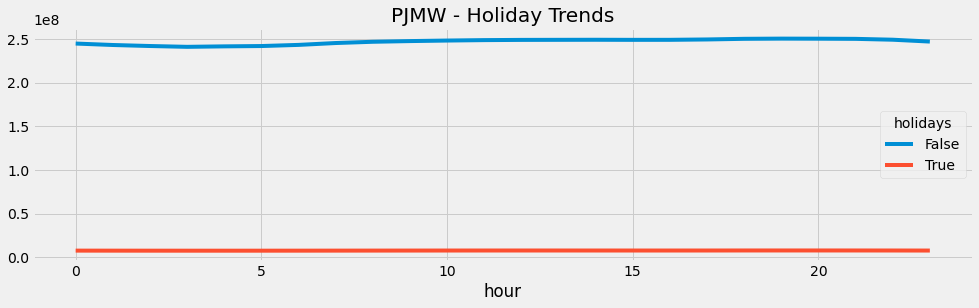

In [24]:
holi_trends = hec2.pivot_table(index=hec2['hour'], 
                     columns=('holidays'), 
                     values='PJMW_MW',
                     aggfunc='sum').plot(figsize=(15,4),
                     title='PJMW - Holiday Trends')

The result shows the same thing as in AEP but with more specific result, which is under 0.5 meaning the usage is way less than AEP.

From this comparison, AEP is still more used than PJMW during holidays. It is due to people mostly going out during the holidays and tend to keep the powers out in their home to save electricity.

### Daily trends depend on the season

Now, we see the daily trend changes depending on the season. We are comparing the trend in summer and winter. We first import the datetime function.

In [33]:
from datetime import datetime

Then, we set the Datetime to 2018 to know the trend of seasons in 2018. 

In [49]:
last_year['Datetime'] = pd.to_datetime(last_year['Datetime'])
last_year3 = last_year.set_index('Datetime')
last_year3.index = pd.to_datetime(last_year3.index)

<ipython-input-49-33ae7a1e383a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_year['Datetime'] = pd.to_datetime(last_year['Datetime'])


Then, we plot out the summer consuption. We range the date from june 22nd to september 22nd. 

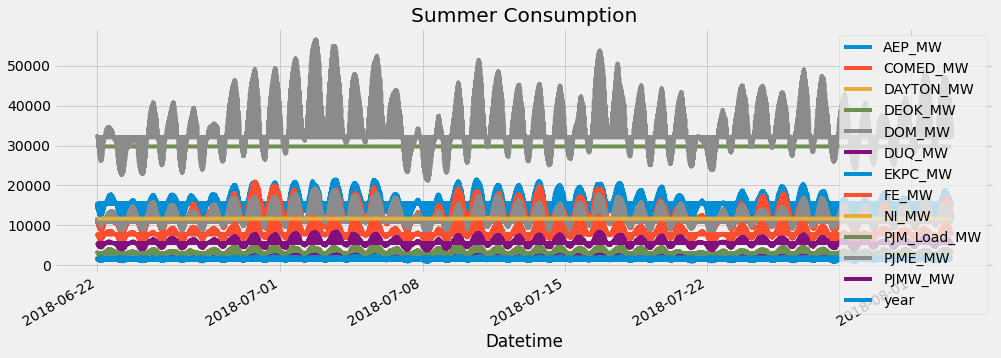

In [52]:
start_date = datetime(2018,6,22)
end_time = datetime(2018,9,22)
last_year3[(start_date <= last_year3.index)&(last_year3.index < end_time)].plot(figsize=(15, 5), title = 'Summer Consumption', grid=True)

The result shows that DOM/PJME has the highest consumption rate during summer. However, because the color code are the same I differ the data below to two graphs. One for PJME and one for DOM.


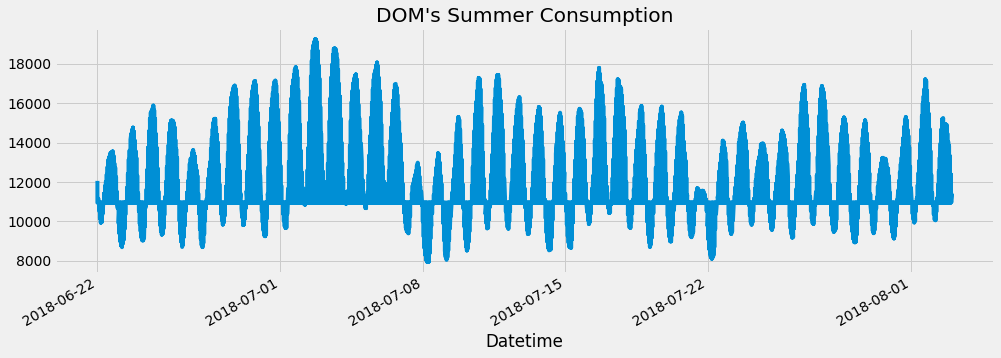

In [64]:
start_date = datetime(2018,6,22)
end_time = datetime(2018,9,22)
last_year3['DOM_MW'][(start_date <= last_year3['DOM_MW'].index)&(last_year3['DOM_MW'].index < end_time)].plot(figsize=(15, 5), title = "DOM's Summer Consumption", grid=True)

The result shows that DOM uses consumtion rate among around 8000 to more than 18000. It means the usage is less than PJME. Now, I want to check the PJME.

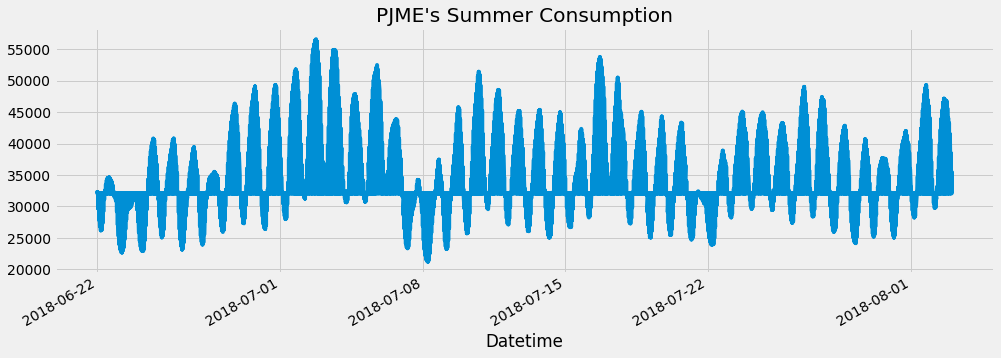

In [65]:
start_date = datetime(2018,6,22)
end_time = datetime(2018,9,22)
last_year3['PJME_MW'][(start_date <= last_year3['PJME_MW'].index)&(last_year3['PJME_MW'].index < end_time)].plot(figsize=(15, 5), title = "PJME's Summer Consumption", grid=True)

The result shows that PJME uses consumtion rate among more than 20000 to more than 55000. It means the usage is the most among other company among summertime. 

We can conclude that most of the electric consumption is from PJME rather than DOM for usage in summer. We can see from the rate of PJME reaching more than 55000 from the usage. 
Done with summer, I try for the winter one. I set the dates of winter first here.

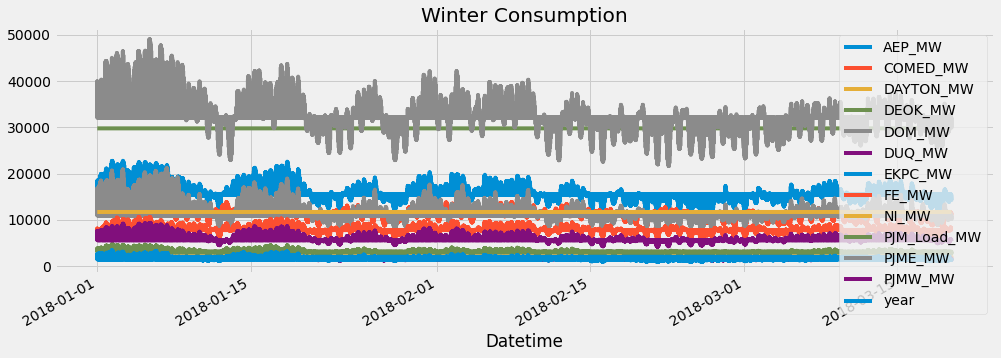

In [55]:
start_date = datetime(2017,12,21)
end_time = datetime(2018,3,20)
last_year3[(start_date <= last_year3.index)&(last_year3.index < end_time)].plot(figsize=(15, 5), title = 'Winter Consumption', grid=True)

Apparently, the graph shows the same result as the ones in summer. PJME is the highest among others. However, I want to make sure by plotting the graph for DOM first below.

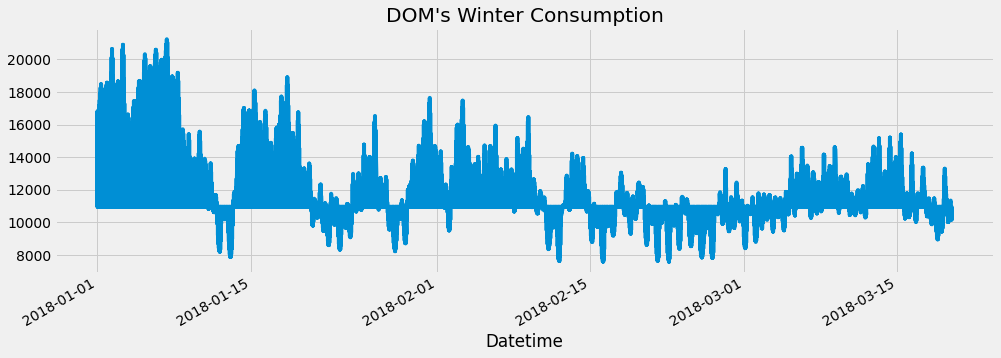

In [66]:
start_date = datetime(2017,12,21)
end_time = datetime(2018,3,20)
last_year3['DOM_MW'][(start_date <= last_year3['DOM_MW'].index)&(last_year3['DOM_MW'].index < end_time)].plot(figsize=(15, 5), title = "DOM's Winter Consumption", grid=True)

The electric consumption from DOM shows from number lower than 8000 to more than 20000. Meaning the usage is more than summer use during electricity. Now, I want to check from PJME.

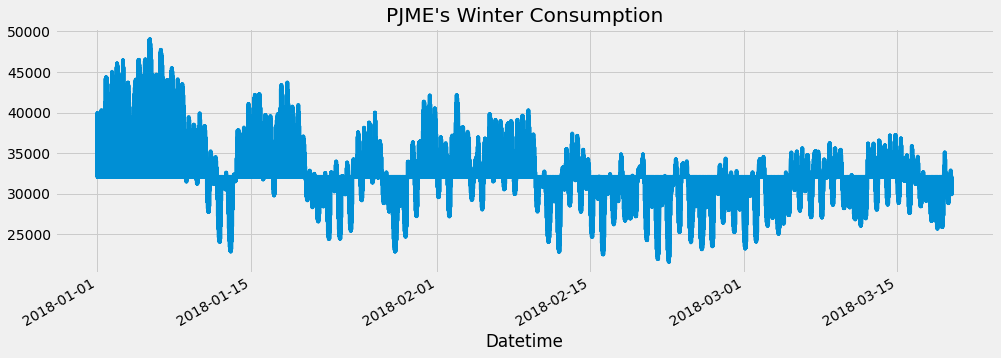

In [67]:
start_date = datetime(2017,12,21)
end_time = datetime(2018,3,20)
last_year3['PJME_MW'][(start_date <= last_year3['PJME_MW'].index)&(last_year3['PJME_MW'].index < end_time)].plot(figsize=(15, 5), title = "PJME's Winter Consumption", grid=True)

The result shows number ranging from lower than 25000 to almost reaching 50000. It shows that the usage is less than summer.

In conclusion to comparison of summer and winter usage. As for DOM, the usage is summer is less than in winter. It means that Virginia needs electric consumption during winter. 
As for PJME, the usage in winter is less than in summer. Seen from the number of usage in summer touches more than 55000. It means that electricity is needed mainly is the east region during summer than west region.

## Number 2

The dataset tells about a regional transmission organization (RTO) in the United States. It operates in the eastern part of the US. The variables provided are `Datetime`, `AEP_MW`, `COMED_MW`, `DAYTON_MW`, 	`DEOK_MW`, 	`DOM_MW`,	`DUQ_MW`,	`EKPC_MW`, 	`FE_MW`, 	`NI_MW`, 	`PJM_Load_MW`, 	`PJME_MW`, and	`PJMW_MW`. The variable of interest is PJM_Load_MW. The variables I'm going to use are Datetime, AEP_MW, and other company depends on the question.

We start from the first question. I would like to know the trend of energy consumption on AEP and FE during March. Firstly, I arrange the data using all the dates in March.

In [70]:
last_year['Datetime'] = pd.to_datetime(last_year['Datetime'])
last_year4 = last_year.set_index('Datetime')
last_year4.index = pd.to_datetime(last_year4.index)

<ipython-input-70-441721c0b26d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_year['Datetime'] = pd.to_datetime(last_year['Datetime'])


Then, I plot out the data to show the range of dates during march from AEP.

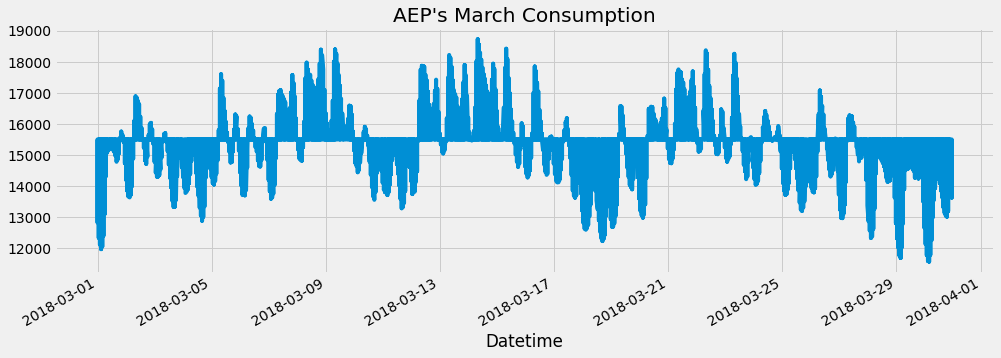

In [73]:
start_date = datetime(2018,3,1)
end_time = datetime(2018,3,31)
last_year4['AEP_MW'][(start_date <= last_year4['AEP_MW'].index)&(last_year4['AEP_MW'].index < end_time)].plot(figsize=(15, 5), title = "AEP's March Consumption", grid=True)

The result shows that around 13 to 17 march, the usage were at the highest among all dates. The lowest was at the end of march. 

Now, I want to see from FE's side.

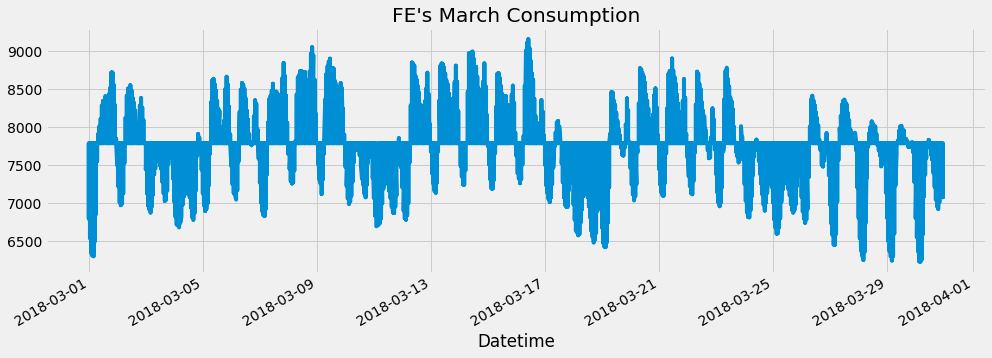

In [74]:
start_date = datetime(2018,3,1)
end_time = datetime(2018,3,31)
last_year4['FE_MW'][(start_date <= last_year4['FE_MW'].index)&(last_year4['FE_MW'].index < end_time)].plot(figsize=(15, 5), title = "FE's March Consumption", grid=True)

The result shows that the highest usage of FE was at around 17 of March. The lowest were at the beginning and end of March. The conclusion is AEP's is used more during March seen from the number of usage reaching 19000 while FE only reached 9000. 

Next question, I want to know the least values from each energy company grouped by dataset. I start from AEP. I used `groupby()` in `Datetime` , then group `AEP_MW` to `min()` and sort the values from the least. 

In [85]:
AEP_min = last_year.groupby('Datetime')['AEP_MW'].min().sort_values()
AEP_min

Datetime
2018-04-24 04:00:00     9815
2018-04-24 03:00:00     9824
2018-05-06 05:00:00     9925
2018-04-24 02:00:00     9929
2018-05-06 04:00:00     9952
                       ...  
2018-02-01 23:00:00    15499
2018-02-01 22:00:00    15499
2018-02-01 21:00:00    15499
2018-05-27 22:00:00    15499
2018-01-01 00:00:00    15499
Name: AEP_MW, Length: 5136, dtype: int64

It shows that the least value from AEP is 9815.0

Now, I want to compare it with EKPC. I use the same function with the ones I did with AEP, however, I replace the AEP with EKPC. 

In [86]:
EKPC_min = last_year.groupby('Datetime')['EKPC_MW'].min().sort_values()
EKPC_min

Datetime
2018-05-02 04:00:00     848
2018-05-02 05:00:00     870
2018-05-06 04:00:00     872
2018-04-15 05:00:00     882
2018-05-06 06:00:00     885
                       ... 
2018-02-07 05:00:00    1464
2018-02-07 04:00:00    1464
2018-02-07 03:00:00    1464
2018-05-17 22:00:00    1464
2018-01-01 00:00:00    1464
Name: EKPC_MW, Length: 5136, dtype: int64

The value shows 848.0 as the least value.

In conclusion, AEP's least value is still larger than EKPC's least value. It is due to most people use AEP way more than EKPC.

Last question, I want to know the energy consumption of PJMW and PMJE during eid week. Firstly, I range the dates. Then, I plot them out.

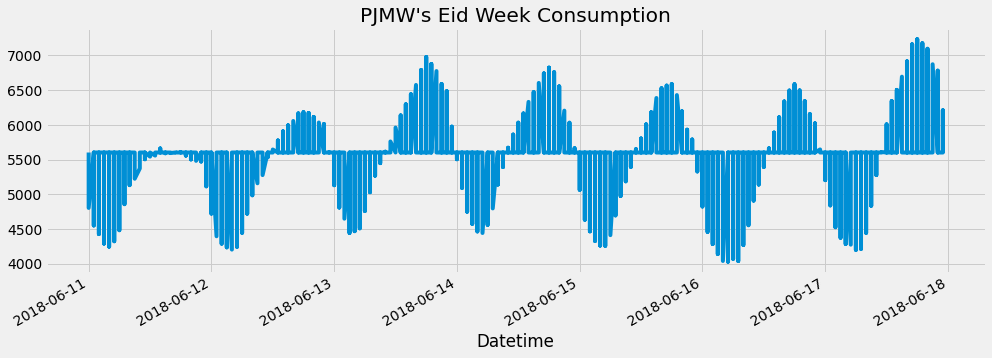

In [88]:
start_date = datetime(2018,6,11)
end_time = datetime(2018,6,18)
last_year4['PJMW_MW'][(start_date <= last_year4['PJMW_MW'].index)&(last_year4['PJMW_MW'].index < end_time)].plot(figsize=(15, 5), title = "PJMW's Eid Week Consumption", grid=True)

The result shows that the usage was at its peak during the end of the eid week, the number reaches more than 7000.  The beginning week of eid were at the lowest due to most people left their homes to celebrate eid at their relatives and mostly stay at their homes. While at eid days which are 14 to 15, the number went up and down meaning the usage depends on the hours since there are times where people left for eid prayer and other families' homes.

Now, let us compare with PJME.

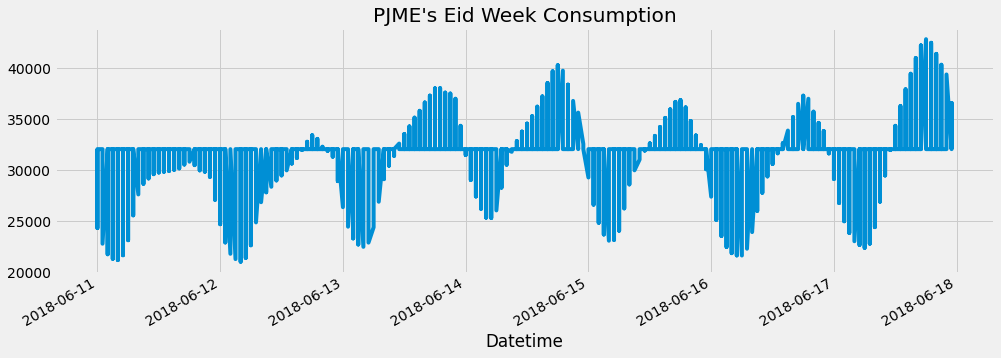

In [89]:
start_date = datetime(2018,6,11)
end_time = datetime(2018,6,18)
last_year4['PJME_MW'][(start_date <= last_year4['PJME_MW'].index)&(last_year4['PJME_MW'].index < end_time)].plot(figsize=(15, 5), title = "PJME's Eid Week Consumption", grid=True)

The result shows that the usage was at its peak during the end of the eid week, the number reaches more than 40000. Just like PJMW, most people left their homes to move to relatives' homes to stay for the week. During eid days, at 14 to 15, the number went up and down. It is due some people can be hosts and guests during the day.

In conclusion, most people from the west move to the east during eid because east region's cities are bigger and has more attractions than west region do. We can see from the east region reached almost 40000 for electrical usage while west only reached 7000. 